In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
!pip install pydub
from pydub import AudioSegment
from pydub.generators import Sine

In [90]:
def collatz_sequence_iterations(seed,nparray):
    iterations = 0
    while seed!=1:
        if seed%2 == 0:
            seed /=2
        else:
            seed = (seed*3) + 1
        iterations+=1
    nparray = np.append(nparray,iterations)
    return nparray

In [91]:
def populate_iterations_till(endseed,nparray):
    startseed = 1
    while(startseed<=endseed):
        nparray = collatz_sequence_iterations(startseed,nparray)
        startseed+=1
    return nparray

In [92]:
# initialize global variables that hold the endseed,
endseed = 2**10
number_list = np.arange(1,endseed+1)

In [93]:
#initialize nparray
nparray = np.array([])
nparray = populate_iterations_till(endseed,nparray)

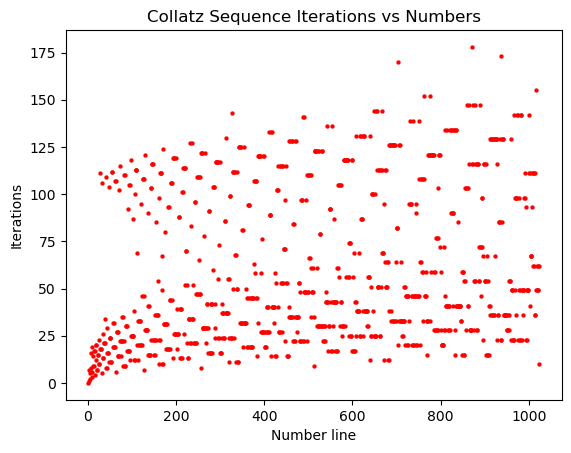

In [94]:
#plot the iterations against the number line on a scatter plot to visualize
fig, ax  = plt.subplots()
ax.set_title('Collatz Sequence Iterations vs Numbers')
ax.set_xlabel('Number line')
ax.set_ylabel('Iterations')
ax.scatter(number_list,nparray,color= 'red',marker = '.',linewidths=0.1)

Lets calculate some summary stats on the iterations numpy array

In [95]:
pd_dataframe = pd.DataFrame(nparray,index = number_list)
pd_dataframe.describe()

,0
count,1024.000000
mean,59.879883
std,40.808379
min,0.000000
25%,27.000000
50%,45.000000
75%,99.250000
max,178.000000


In [96]:
pd_dataframe.columns = ['iterations']
pd_dataframe.head()

,iterations
1,0.0
2,1.0
3,7.0
4,2.0
5,5.0


I want to then plot the distrubution of the iterations to see if there are any observable patterns

(array([ 17.,  93., 143., 145., 110.,  90.,  50.,  31.,  18.,  23.,  36.,
         44.,  65.,  71.,  50.,  22.,  10.,   3.,   0.,   3.]),
 array([  0. ,   8.9,  17.8,  26.7,  35.6,  44.5,  53.4,  62.3,  71.2,
         80.1,  89. ,  97.9, 106.8, 115.7, 124.6, 133.5, 142.4, 151.3,
        160.2, 169.1, 178. ]),
 <BarContainer object of 20 artists>)

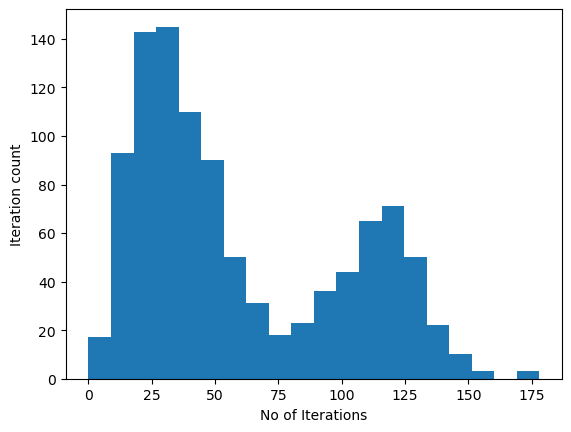

In [97]:
ax = plt.axes(xlabel = 'No of Iterations', ylabel = 'Iteration count')
plt.hist(nparray,bins = 20)

In [98]:
unique_count_df = pd_dataframe.value_counts()
unique_count_df

iterations
28.0          30
33.0          25
36.0          24
41.0          23
30.0          23
              ..
60.0           1
4.0            1
3.0            1
2.0            1
178.0          1
Name: count, Length: 144, dtype: int64

We note that from the distrubution above and the value counts function output, the most number of iterations seem to occur near 66 and slowly taper off. Nothing worthy of a discernible pattern. 

In [103]:
# Define a mapping from iterations to frequency
# You can adjust this mapping based on your preferences
def iterations_to_frequency(iterations):
    #return 440 * iterations  # Just a simple example, adjust as needed
    return 440 * 2**(iterations / 12)  # Just a simple example, adjust as needed
    #return 440 * 2**(iterations % 12)  # Just a simple example, adjust as needed

# Generate audio based on the number of iterations
def generate_audio(iterations_list, duration=50):  # Duration in milliseconds
    audio = AudioSegment.empty()
    for iterations in iterations_list:
        frequency = iterations_to_frequency(iterations)
        sine_wave = Sine(frequency).to_audio_segment(duration=duration)
        audio += sine_wave
    return audio

# Example usage
audio = generate_audio(nparray)
audio.export("collatz_audio.wav", format="wav")

<_io.BufferedRandom name='collatz_audio.wav'>